In [2]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import plt_functions as pltf

In [3]:
def load_data():
    print("load_data")
    data = np.loadtxt('./data/mnistsub.csv',delimiter=',')
    X = data[:, 0:-1]
    y = data[:, -1]
    return X, y

In [4]:
def normalize_data(X):
    print("normalize_data")
    max_val = np.amax(X)
    min_val = np.amin(X)
    range_val = max_val - min_val
    return np.divide(X,range_val)

In [5]:
def randomize_data(X, y, seed=7, num_train=637):
    print("randomize_data")
    # Create generator object with seed (for consistent testing across compilation)
    #gnrtr = np.random.default_rng(7)
    np.random.seed(seed)

    # Create random array with values permuted from the num elements of y
    #r = gnrtr.permutation(len(y))
    r = np.random.permutation(len(y))

    # Reorganize X and y based on the random permutation, all columns
    X, y = X[r, :], y[r]
    
    # Assign the first 5000 rows from X
    X_s, y_s = X[:num_train, :], y[:num_train]

    return X, y, X_s, y_s

In [6]:
# Regrssion using GridSearchCV
def grid_search_SVC(X, y, cclass, cv, params,refit=True):   
    print("grid_search_SVC ", params)
    gscv = GridSearchCV(cclass(), params, cv = cv, refit=refit)
    gscv.fit(X,y)
    print(str(abs(gscv.best_score_))+","+str(gscv.best_params_))
    return (gscv)

In [10]:
def exercise1():
    print("exercise1")
    X, y = load_data()
    X = normalize_data(X)
    X, y, X_s, y_s = randomize_data(X, y)
    #test_params = [.1,1,10,100,1000]
    svc_params = [{'kernel':['poly'], 
                   'C':[.1,1,10,100,1000],
                   #'gamma':test_params,
                   'degree':[2,3,4,5,6,7]}]
    
    """svc_params = [{'kernel':['linear'], 
                   'C':test_params},
                  
                  {'kernel':['rbf'], 
                   'C':test_params,
                   'gamma':test_params},
                  
                  {'kernel':['poly'], 
                   'C':test_params,
                   'gamma':test_params,
                   'degree':[2,3,4,5,6,7,8,9]}]"""
    
    for svc_param in svc_params:
        # Regression using Grid Search Cross Validation
        gscv = grid_search_SVC(X_s, y_s, SVC, 5, svc_param)
        exercise1_2(gscv, X_s, y_s)   

In [11]:
def exercise1_2(gscv, X_s, y_s):
    clf = gscv.best_estimator_
    
    # Separate vectors
    X1 = X_s[clf.support_, 0]
    X2 = X_s[clf.support_, 1]
    
    # Meshgrid
    xx, yy = pltf.get_meshgrid(X1, X2)
    
    # plot boundary and data points
    fig = plt.figure()
    title = "Ex 1, accuracy "+str(round(abs(gscv.best_score_),5))+" "
    for key in gscv.best_params_:
        title = title+key+":"+str(gscv.best_params_[key])+" "
    fig.suptitle(title)
    
    
    ax = fig.add_subplot(1, 1, 1)
    pltf.add_countour(ax, xx, yy, clf, colors='r',linewidths=0.5)
    ax.scatter(X_s[:,0], X_s[:,1], s=.5,c=y_s)
    plt.show()

    """bc = gscv0.cv_results_
    be = gscv0.best_estimator_
    bs = gscv0.best_score_
    bp = gscv0.best_params_
    bi = gscv0.best_index_
    bss = gscv0.scorer_
    bn = gscv0.n_splits_
    br = gscv0.refit_time_"""

exercise1
load_data
normalize_data
randomize_data
grid_search_SVC  {'kernel': ['poly'], 'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4, 5, 6, 7]}
0.7802903543307086,{'C': 1, 'degree': 3, 'kernel': 'poly'}


/home/jupyter/plt_functions.py:32: UserWarning: The following kwargs were not used by contour: 's'
  ax.contour(xx, yy, Z, s=1, **params)


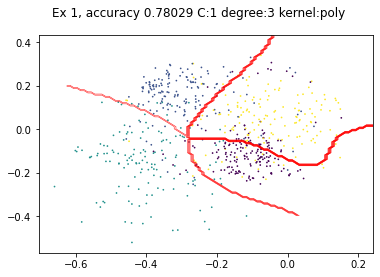

In [12]:
exercise1()